# 训练 CycleGAN 实现照片转莫奈印象派画风

> 作者：[同济子豪兄](https://space.bilibili.com/1900783)、杨逸飞 2022-4-10

## 进入MMGeneration主目录

In [1]:
import os
os.chdir('mmgeneration')
os.listdir()

['.git',
 '.dev_scripts',
 '.github',
 '.gitignore',
 '.pre-commit-config.yaml',
 '.pylintrc',
 '.readthedocs.yml',
 'CITATION.cff',
 'LICENSE',
 'LICENSES.md',
 'MANIFEST.in',
 'README.md',
 'README_zh-CN.md',
 'apps',
 'configs',
 'demo',
 'docker',
 'docs',
 'mmgen',
 'model-index.yml',
 'requirements.txt',
 'requirements',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 'mmgen.egg-info',
 'outputs',
 'data',
 'checkpoints',
 'work_dirs',
 '.ipynb_checkpoints',
 '20220506153235-plot',
 'temp.jpg',
 '20220506153939',
 '20220506153939-plot',
 '20220506154314',
 '20220506154314-plot',
 '20220506154822',
 '20220506154822-plot',
 '20220506155137',
 '20220506155137-plot',
 '20220506160404',
 '20220506160426',
 '20220506160534']

## 下载 monet2photo 数据集

常用CycleGAN 数据集：https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/

In [2]:
# 下载 monet2photo 图像数据集压缩包
!wget https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/monet2photo.zip -O data/monet2photo.zip

# 备用链接，仅供国内教学使用
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/dataset/monet2photo.zip -O data/monet2photo.zip
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/dataset/cezanne2photo.zip -O data/cezanne2photo.zip
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/dataset/iphone2dslr_flower.zip -O data/iphone2dslr_flower.zip
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/dataset/horse2zebra.zip -O data/horse2zebra.zip
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/dataset/summer2winter_yosemite.zip -O data/summer2winter_yosemite.zip


--2022-05-06 16:27:20--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/monet2photo.zip
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 305231073 (291M) [application/zip]
Saving to: ‘data/monet2photo.zip’

data/monet2photo.zi   7%[>                   ]  22.25M   633KB/s    eta 9m 2s  ^C


In [4]:
# 解压至 data/monet2photo 目录
!unzip -o data/monet2photo.zip -d data/monet2photo/

Archive:  data/monet2photo.zip
   creating: data/monet2photo/monet2photo/
   creating: data/monet2photo/monet2photo/trainA/
  inflating: data/monet2photo/monet2photo/trainA/01159.jpg  
  inflating: data/monet2photo/monet2photo/trainA/01048.jpg  
  inflating: data/monet2photo/monet2photo/trainA/01144.jpg  
  inflating: data/monet2photo/monet2photo/trainA/00799.jpg  
  inflating: data/monet2photo/monet2photo/trainA/00897.jpg  
  inflating: data/monet2photo/monet2photo/trainA/00998.jpg  
  inflating: data/monet2photo/monet2photo/trainA/00883.jpg  
  inflating: data/monet2photo/monet2photo/trainA/00985.jpg  
  inflating: data/monet2photo/monet2photo/trainA/00311.jpg  
  inflating: data/monet2photo/monet2photo/trainA/01243.jpg  
  inflating: data/monet2photo/monet2photo/trainA/01259.jpg  
  inflating: data/monet2photo/monet2photo/trainA/00454.jpg  
  inflating: data/monet2photo/monet2photo/trainA/00461.jpg  
  inflating: data/monet2photo/monet2photo/trainA/01283.jpg  
  inflating: data/mone

## 数据集文件目录结构

https://mmgeneration.readthedocs.io/en/latest/quick_run.html#datasets-for-image-translation-models

In [20]:
'''
./data/monet2photo/monet2photo
                        ├── testA
                        │   └── XXX.jpg
                        ├── testB
                        │   └── XXX.jpg
                        ├── trainA
                        │   └── XXX.jpg
                        └── trainB
                            └── XXX.jpg
                            
其中，A为莫奈的印象派画作，B为风景照片
'''

### 配置 config 文件

In [6]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/cyclegan_lsgan_resnet_in_facades_b1x1_80k_monet2photo.py -O configs/cyclegan/cyclegan_lsgan_resnet_in_facades_b1x1_80k_monet2photo.py

--2022-05-06 16:54:53--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/cyclegan_lsgan_resnet_in_facades_b1x1_80k_monet2photo.py
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 5243 (5.1K) [binary/octet-stream]
Saving to: ‘configs/cyclegan/cyclegan_lsgan_resnet_in_facades_b1x1_80k_monet2photo.py’

configs/cyclegan/cy 100%[===================>]   5.12K  --.-KB/s    in 0.003s  

2022-05-06 16:54:53 (1.77 MB/s) - ‘configs/cyclegan/cyclegan_lsgan_resnet_in_facades_b1x1_80k_monet2photo.py’ saved [5243/5243]



## 在自己的数据集上训练模型(运行半小时左右)

训练过程中，在 work_dirs/experiments/experiments_name目录下

training_samples保存了训练过程中达到不同迭代次数时的训练效果

ckpt/experiments_name保存了训练过程中达到不同迭代次数时的模型权重文件

In [ ]:
!bash tools/dist_train.sh configs/cyclegan/cyclegan_lsgan_resnet_in_facades_b1x1_80k_monet2photo.py 1 --work-dir work_dirs/experiments/cyclegan_monet2photo

/environment/miniconda3/lib/python3.7/site-packages/torch/distributed/launch.py:186: FutureWarning: The module torch.distributed.launch is deprecated
and will be removed in future. Use torchrun.
Note that --use_env is set by default in torchrun.
If your script expects `--local_rank` argument to be set, please
change it to read from `os.environ['LOCAL_RANK']` instead. See 
https://pytorch.org/docs/stable/distributed.html#launch-utility for 
further instructions

  FutureWarning,
tools/train.py:98: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
tools/train.py:108: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performan

In [ ]:
import time
time.localtime()

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

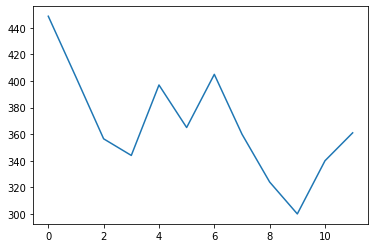

In [16]:
plt.plot(list1)

In [15]:
list1 = [448.7200, 402.9268, 356.5074, 344, 397, 365 ,405,360,324,300,340,361]